<h1> South Korea Tourism Analysis </h1>

<!-- <p> Nama: <li>Gilbert Samuel Nicholas Silaban (195150200111013),<li>M Nugraha Delta Revanza (195150201111047),<li>M Hidayat (195150201111001) -->
<!-- <p> Kelas: Visualisasi Data -A -->


<p> Dataset ini merupakan hasil sensus atau perhitungan dari KTO (Korean Tourism Organization) terhadap jumlah wisatawan ke Korea Selatan. Hasil ini dibagi menjadi tiga bagian yakni umur, gender, dan tujuan. 

<p>Disini, kami akan menganalisis 

Untuk memulai, terlebih dahulu kita mengimpor key dari Kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


Membuat direktori kaggle dan membuat file kaggle serta modifikasi file kaggle.json

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Download dataset Korea Selatan dari Kaggle

In [ ]:
!kaggle datasets download -d bappekim/south-korea-visitors

  0% 0.00/99.4k [00:00<?, ?B/s]
100% 99.4k/99.4k [00:00<00:00, 22.9MB/s]


Membuka file zip south-korea-visitor menjadi bentuk csv.

In [ ]:
!unzip "/content/south-korea-visitors.zip" -d "/content/"

Archive:  /content/south-korea-visitors.zip
  inflating: /content/Enter_korea_by_age.csv  
  inflating: /content/Enter_korea_by_gender.csv  
  inflating: /content/Enter_korea_by_purpose.csv  


Import Library dan membuat dataframe berdasarkan tiga file

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dfa=pd.read_csv('Enter_korea_by_age.csv')
dfg=pd.read_csv('Enter_korea_by_gender.csv')
dfp=pd.read_csv('Enter_korea_by_purpose.csv')

Menampilkan tiga dataframe secara sekaligus

In [ ]:
table = [dfa,dfg,dfp]
for query in table:
  print(table)

[       date           nation  visitor     growth      share  age0-20  \
0    2019-1            China   392814  28.737870  35.555117    36520   
1    2019-1            Japan   206526  23.606830  18.693468    18015   
2    2019-1           Taiwan    87954  16.003693   7.961057    18888   
3    2019-1        Hong Kong    35896   3.533212   3.249086     3890   
4    2019-1            Macao     2570 -12.376406   0.232621      223   
..      ...              ...      ...        ...        ...      ...   
955  2020-4   Oceania others       13 -97.239915   0.044195        0   
956  2020-4     South Africa       22 -98.101812   0.074792        0   
957  2020-4    Africa others      177 -95.412131   0.601734        3   
958  2020-4        Stateless        3 -95.312500   0.010199        0   
959  2020-4  Overseas Korean      698 -96.540101   2.372939       13   

     age21-30  age31-40  age41-50  age51-60  age61  
0      108591    103657     48574     40893  40998  
1       57921     34165     

Mencoba melihat isi dari dataframe age dengan dfa.info()

In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      960 non-null    object 
 1   nation    960 non-null    object 
 2   visitor   960 non-null    int64  
 3   growth    960 non-null    float64
 4   share     960 non-null    float64
 5   age0-20   960 non-null    int64  
 6   age21-30  960 non-null    int64  
 7   age31-40  960 non-null    int64  
 8   age41-50  960 non-null    int64  
 9   age51-60  960 non-null    int64  
 10  age61     960 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 82.6+ KB


Menampilkan 15 data dari dataframe age dengan dfa.head()

In [ ]:
dfa.head(15)

,date,nation,visitor,growth,share,age0-20,age21-30,age31-40,age41-50,age51-60,age61
0,2019-1,China,392814,28.737870,35.555117,36520,108591,103657,48574,40893,40998
1,2019-1,Japan,206526,23.606830,18.693468,18015,57921,34165,39811,33857,20330
2,2019-1,Taiwan,87954,16.003693,7.961057,18888,17927,18595,18862,8169,4566
3,2019-1,Hong Kong,35896,3.533212,3.249086,3890,11384,7400,5461,4629,2137
4,2019-1,Macao,2570,-12.376406,0.232621,223,1013,762,264,181,92
5,2019-1,Phillipines,30473,0.062389,2.758229,1436,5051,5486,3140,1831,811
6,2019-1,Indonesia,18842,10.614066,1.705462,2732,4213,3643,2895,1488,613
7,2019-1,Thailand,41334,-8.026079,3.741300,3310,10977,10551,5821,3403,1873
8,2019-1,Vietnam,20183,23.936138,1.826842,1824,5484,4200,1963,1095,450
9,2019-1,India,8671,16.844091,0.784846,258,1421,2310,1322,522,197


Menghitung berapa bulan dataset diambil

In [ ]:
dfa.groupby('nation').date.count()

nation
*GCC               16
Africa others      16
America others     16
Asia others        16
Austrailia         16
Austria            16
Bangladesh         16
Belgium            16
Brazil             16
Bulgaria           16
Cambodia           16
Canada             16
China              16
Croatia            16
Denmark            16
Europe others      16
Finland            16
France             16
Germany            16
Greece             16
Hong Kong          16
India              16
Indonesia          16
Iran               16
Ireland            16
Israel             16
Italy              16
Japan              16
Kazakhstan         16
Macao              16
Malaysia           16
Mexico             16
Mongolia           16
Myanmar            16
Netherland         16
New Zealand        16
Norway             16
Oceania others     16
Overseas Korean    16
Pakistan           16
Phillipines        16
Poland             16
Portugal           16
Romania            16
Russia             16
Sin

Mengecek apakah data tersebut bernilai null atau tidak

In [ ]:
dfa.isnull()

,date,nation,visitor,growth,share,age0-20,age21-30,age31-40,age41-50,age51-60,age61
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
955,False,False,False,False,False,False,False,False,False,False,False
956,False,False,False,False,False,False,False,False,False,False,False
957,False,False,False,False,False,False,False,False,False,False,False
958,False,False,False,False,False,False,False,False,False,False,False


Mengecek dataframe berdasarkan gender

In [ ]:
dfg.head(15)

,date,nation,visitor,growth,share,male,female,crewman
0,2019-1,China,392814,28.737870,35.555117,147511,231722,13581
1,2019-1,Japan,206526,23.606830,18.693468,75070,129029,2427
2,2019-1,Taiwan,87954,16.003693,7.961057,30805,56202,947
3,2019-1,Hong Kong,35896,3.533212,3.249086,12172,22729,995
4,2019-1,Macao,2570,-12.376406,0.232621,748,1787,35
5,2019-1,Phillipines,30473,0.062389,2.758229,10460,7295,12718
6,2019-1,Indonesia,18842,10.614066,1.705462,7295,8289,3258
7,2019-1,Thailand,41334,-8.026079,3.741300,12205,23730,5399
8,2019-1,Vietnam,20183,23.936138,1.826842,7457,7559,5167
9,2019-1,India,8671,16.844091,0.784846,5123,907,2641


Menampilkan informasi dari dataframe 

In [ ]:
dfg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     960 non-null    object 
 1   nation   960 non-null    object 
 2   visitor  960 non-null    int64  
 3   growth   960 non-null    float64
 4   share    960 non-null    float64
 5   male     960 non-null    int64  
 6   female   960 non-null    int64  
 7   crewman  960 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 60.1+ KB


Mengecek apakah ada data null pada dataframe gender

In [ ]:
dfg.isnull()

,date,nation,visitor,growth,share,male,female,crewman
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
955,False,False,False,False,False,False,False,False
956,False,False,False,False,False,False,False,False
957,False,False,False,False,False,False,False,False
958,False,False,False,False,False,False,False,False


In [ ]:
dfp.head()

,date,nation,visitor,growth,share,tourism,business,official affairs,studying,others
0,2019-1,China,392814,28.737870,35.555117,320113,2993,138,8793,60777
1,2019-1,Japan,206526,23.606830,18.693468,198805,2233,127,785,4576
2,2019-1,Taiwan,87954,16.003693,7.961057,86393,74,22,180,1285
3,2019-1,Hong Kong,35896,3.533212,3.249086,34653,59,2,90,1092
4,2019-1,Macao,2570,-12.376406,0.232621,2506,2,0,17,45


In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              960 non-null    object 
 1   nation            960 non-null    object 
 2   visitor           960 non-null    int64  
 3   growth            960 non-null    float64
 4   share             960 non-null    float64
 5   tourism           960 non-null    int64  
 6   business          960 non-null    int64  
 7   official affairs  960 non-null    int64  
 8   studying          960 non-null    int64  
 9   others            960 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 75.1+ KB


In [ ]:
dfp.isnull()

,date,nation,visitor,growth,share,tourism,business,official affairs,studying,others
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
955,False,False,False,False,False,False,False,False,False,False
956,False,False,False,False,False,False,False,False,False,False
957,False,False,False,False,False,False,False,False,False,False
958,False,False,False,False,False,False,False,False,False,False


Melihat rata-rata nilai dari beberapa negara

In [ ]:
dfa.groupby('nation').mean()['visitor'].sort_values(ascending=False)

nation
China              414332.3750
Japan              230973.8125
Taiwan              89039.3125
USA                 73169.9375
Hong Kong           48947.4375
Thailand            40282.6875
Vietnam             39057.5625
Phillipines         35035.6250
Malaysia            28482.6250
Russia              25039.2500
Indonesia           19965.1250
Singapore           16441.0000
Canada              14443.1250
Overseas Korean     13201.0000
Austrailia          12187.3750
India               10015.7500
UK                   9989.3750
Germany              8448.3750
Mongolia             8350.6875
France               7712.0625
Uzbekistan           6380.5000
Myanmar              5436.0625
Asia others          5305.7500
Kazakhstan           3817.3125
Macao                3645.5625
Africa others        3395.0000
Italy                3390.3125
Europe others        3254.3125
Cambodia             3143.0625
America others       2974.8125
New Zealand          2799.5000
Netherland           2796.4375
*

In [ ]:
total=dfa.groupby('nation').sum()['visitor'].sort_values(ascending=False)
print(total)

nation
China              6629318
Japan              3695581
Taiwan             1424629
USA                1170719
Hong Kong           783159
Thailand            644523
Vietnam             624921
Phillipines         560570
Malaysia            455722
Russia              400628
Indonesia           319442
Singapore           263056
Canada              231090
Overseas Korean     211216
Austrailia          194998
India               160252
UK                  159830
Germany             135174
Mongolia            133611
France              123393
Uzbekistan          102088
Myanmar              86977
Asia others          84892
Kazakhstan           61077
Macao                58329
Africa others        54320
Italy                54245
Europe others        52069
Cambodia             50289
America others       47597
New Zealand          44792
Netherland           44743
*GCC                 38103
Turkey               35553
Mexico               34580
Spain                33570
Ukraine              

Basic Visualization

Percobaan ini, akan kita sampaikan penggunaan visualisasi untuk mendeteksi negara mana yang sering berkunjung ke Korea Selatan. 

In [ ]:
def all_graph(df, x, y, length):
    fig,axes = plt.subplots(1,1,figsize=(12, 14))
    axes.set_title(y)
    axes.set_ylabel(y)
    axes.set_xlabel(x)
    axes.set_xticklabels(df[x].unique(), rotation=45)
    qualitative_colors = sns.color_palette("Paired", length)
    sns.lineplot(x, y, ci=None, hue='nation', 
                 marker='o', data=df, linewidth=2, palette=qualitative_colors)
    axes.legend(loc='center left', bbox_to_anchor=(1, 0.5))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


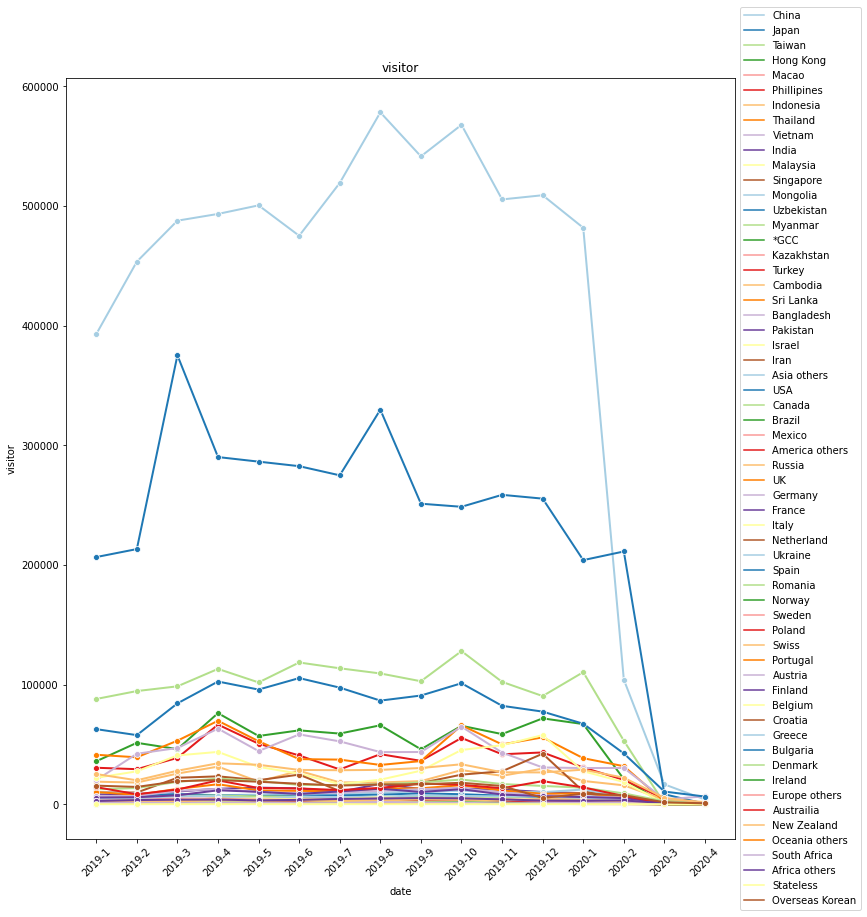

In [ ]:
all_graph(dfa,'date','visitor', 60)
#Grafik secara keseluruhan negara dengan wisatawan tertinggi ke Korea Selatan

In [ ]:
def time_visitor_graph(name):
    fig,axes = plt.subplots(1,1,figsize=(10, 8))
    x = dfa[dfa['nation']==name].date
    y = dfa[dfa['nation']==name].visitor
    axes.set_title(name)
    axes.set_ylabel("The number of visitors")
    axes.set_xlabel("Date")
    axes.set_xticklabels(x, rotation=45)
    axes.plot(x, y, linewidth=3.0)

In [ ]:
top_countries = ['China', 'Japan', 'Taiwan', 'USA']

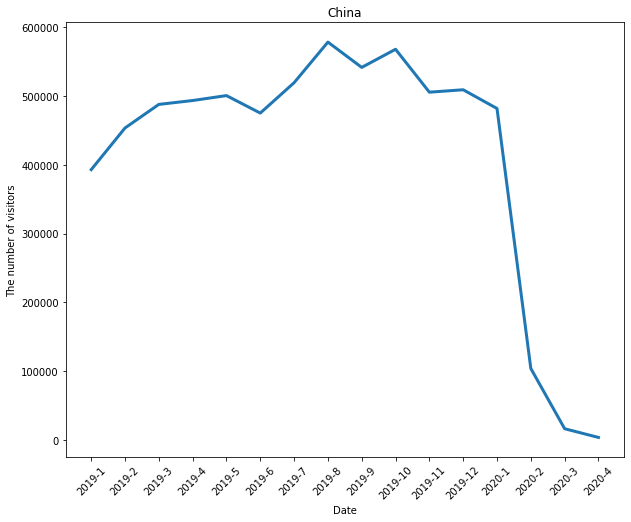

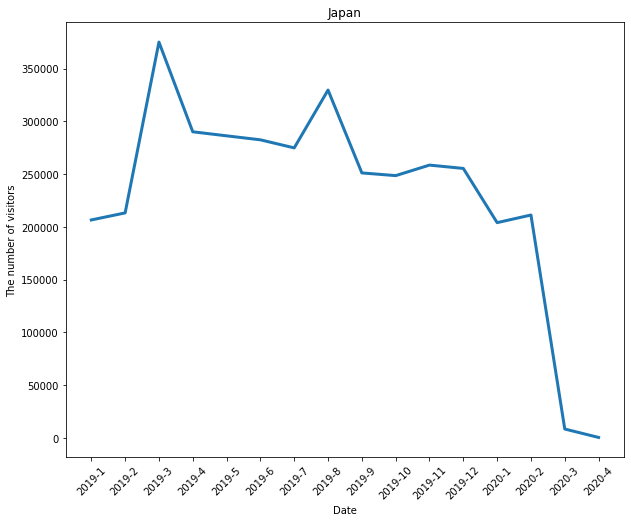

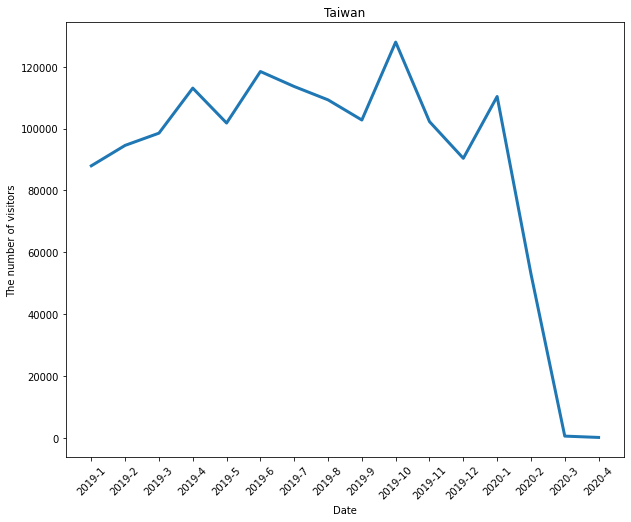

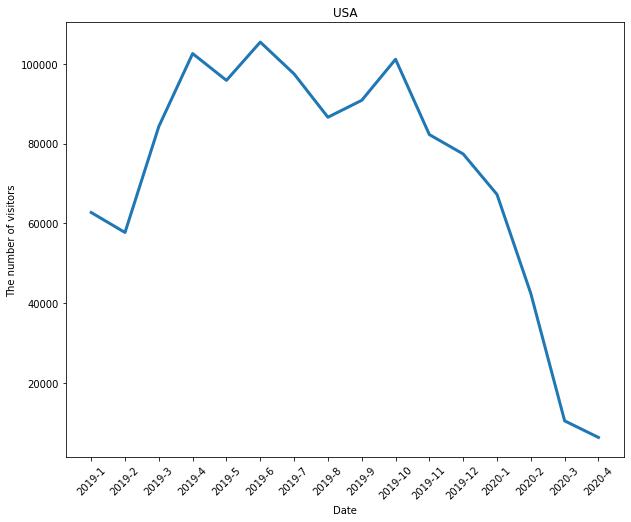

In [ ]:
for countries in top_countries:
  time_visitor_graph(countries)
  #Grafik Line dari negara tertinggi ke korea selatan

Kita akan melihat total pengunjung berdasarkan bulanan

In [ ]:
import plotly.express as px
fig = px.bar(dfa,x='date',y='visitor',labels={"index":"Tanggal","value":"Jumlah Pengunjung"},title="Total Tourism in Korean") 
fig.show()

In [ ]:
import plotly.express as px
df = px.data.gapminder()
fig = px.area(dfa, x="date", y="visitor", color="nation", line_group="nation")
fig.show()
#Grafik negara dengan wisatawan tertinggi ke Korea Selatan

Setelah itu, kami mencoba membandingkan wisatawan datang pada tahun 2019 dengan tahun 2020

In [ ]:
def month_compare_graph(name):
    fig,axes = plt.subplots(1,1,figsize=(10, 8))
    x = [1, 2, 3, 4]
    y = dfa[(dfa['date'].str.endswith(('-1', '-2', '-3', '-4'))) & (dfa['nation'] == name)].visitor
    
    axes.set_title(name)
    axes.set_ylabel("The number of visitors")
    axes.set_xlabel("Month")
    axes.plot(x, y[:4], c='b', linewidth=5.0, label='2019')
    axes.plot(x, y[4:], c='r', linewidth=5.0, label='2020')
    axes.legend(loc=3)

Perbandingan ini terbatas pada 4 bulan saja. Hal ini dikarenakan pada tahun 2020, pengambilan data dilakukan samapai bulan 4

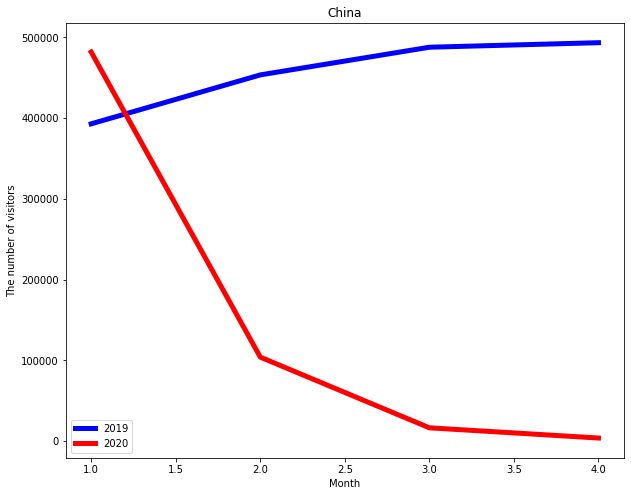

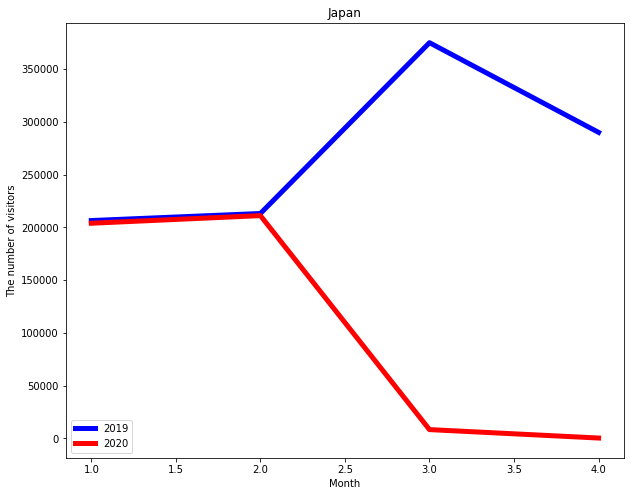

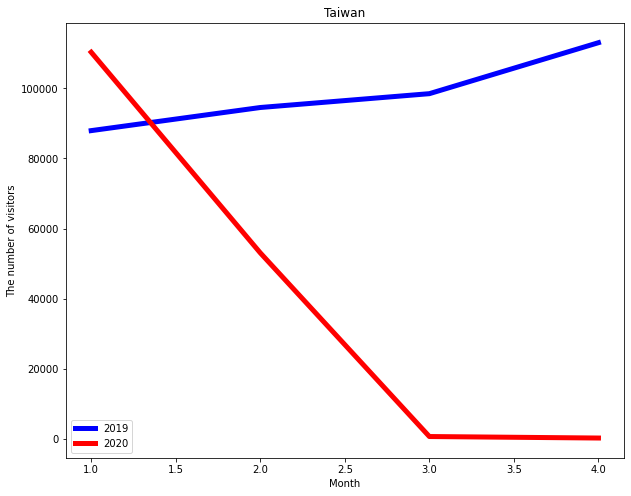

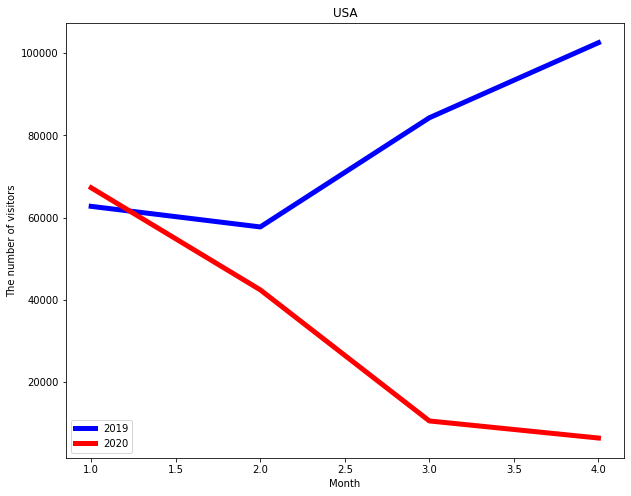

In [ ]:
for country in top_countries:
    month_compare_graph(country)

Kami akan melihat berapa persen masyarakat dari negara tersebut datang ke Korea setiap tahunnya. Disini terlihat bahwa setiap negara memiliki perbandingan yang sama untuk berkunjung ke negara tersebut.

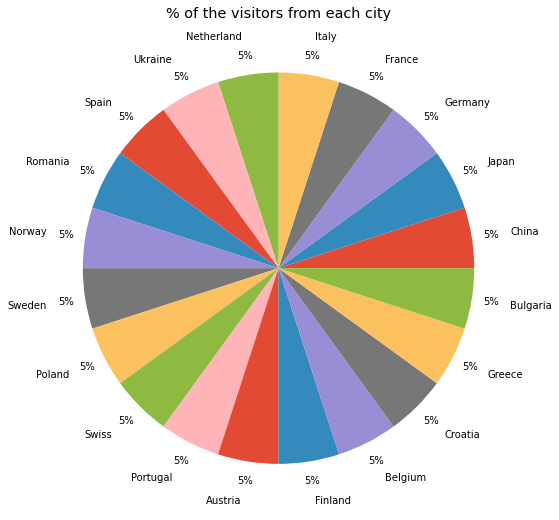

In [ ]:
nation = pd.DataFrame(dfa['nation'].value_counts())[:20]
city_names = nation.index
count = nation['nation']

plt.style.use('ggplot')
plt.figure(figsize=(9,9))
plt.rc('font', size=10)
plt.pie(count, autopct='%1.0f%%', labels = city_names, pctdistance=1.1, labeldistance=1.2)
plt.title('% of the visitors from each city')
plt.show()
#Presentase wisatawan berkunjung ke Korea Selatan dari tiap engara

Disini, akan dilihat pada bulan berapa usia dibawah 20 tahun belibur ke Korea Selatan. 

In [ ]:
g = px.bar(dfa, x="date", y="age0-20", color="visitor", title="Tourism goes to Korea based by Age (20 below)")
g.show()
#Jumlah wisatawan usia 0-20 tahun ke Korea Selatan

Kita akan melihat persebaran data tersebut

In [ ]:
fig = px.histogram(dfa, x="age0-20")
fig.show()
#Pesebaran usia 0 -20 tahun ke Korea Selatan

Setelah usia dibawah 20 tahun, kita melihat turis dengan usia 21-30 tahun

In [ ]:
h = px.bar(dfa, x="date", y="age21-30", color="visitor", title="Tourism goes to Korea based by Age (20 below)")
h.show()
#Jumlah wisatawan usia 21-30 tahun ke Korea Selatan

Pada bulan April 2019 dan Oktober 2019. wisatawan berusia 21-30 berkunjung ke Korea Selatan. Setelah dilihat bulanan, maka dilihat pesebaran data tersebut

In [ ]:
fig = px.histogram(dfa, x="age21-30")
fig.show()
#Pesebaran usia 21 -30 tahun ke Korea Selatan

In [ ]:
i = px.bar(dfa, x="date", y="age31-40", color="visitor", title="Tourism goes to Korea based by Age (20 below)")
i.show()
#Jumlah wisatawan usia 31-40 tahun ke Korea Selatan

Pada bulan April 2019 dan Oktober 2019. wisatawan berusia 31-40 berkunjung ke Korea Selatan. Setelah dilihat bulanan, maka dilihat pesebaran data tersebut

In [ ]:
fig = px.histogram(dfa, x="age31-40")
fig.show()
#Pesebaran usia 31 -40 tahun ke Korea Selatan

In [ ]:
j = px.bar(dfa, x="date", y="age41-50", color="visitor", title="Tourism goes to Korea based by Age (20 below)")
j.show()
#Jumlah wisatawan usia 21-30 tahun ke Korea Selatan

Pada bulan April 2019. wisatawan berusia 41-50 berkunjung ke Korea Selatan. Setelah dilihat bulanan, maka dilihat pesebaran data tersebut

In [ ]:
fig = px.histogram(dfa, x="age41-50")
fig.show()
#Pesebaran usia 41 -50 tahun ke Korea Selatan

Gender Visualization

Untuk memulai visualisasi berdasarkan gender, terlebih membuat sebuah variabel top_countries terlebih dahulu

In [ ]:
top_countries_gender = dfg.groupby('nation').mean()['visitor'].sort_values(ascending=False)[:10].index
top_countries_gender

Index(['China', 'Japan', 'Taiwan', 'USA', 'Hong Kong', 'Thailand', 'Vietnam',
       'Phillipines', 'Malaysia', 'Russia'],
      dtype='object', name='nation')

In [ ]:
df_gtop = dfg[dfg['nation'].isin(top_countries_gender)]
df_gtop

,date,nation,visitor,growth,share,male,female,crewman
0,2019-1,China,392814,28.737870,35.555117,147511,231722,13581
1,2019-1,Japan,206526,23.606830,18.693468,75070,129029,2427
2,2019-1,Taiwan,87954,16.003693,7.961057,30805,56202,947
3,2019-1,Hong Kong,35896,3.533212,3.249086,12172,22729,995
5,2019-1,Phillipines,30473,0.062389,2.758229,10460,7295,12718
...,...,...,...,...,...,...,...,...
907,2020-4,Thailand,299,-99.571179,1.016488,111,136,52
908,2020-4,Vietnam,6597,-89.556586,22.427333,3138,3394,65
910,2020-4,Malaysia,152,-99.652381,0.516743,55,54,43
925,2020-4,USA,6417,-93.740978,21.815400,1581,1475,3361


In [ ]:
fig = px.pie(df_gtop, values='female', names='nation')
fig.show()
#Presentase wanita ke Korea Selatan

In [ ]:
fig = px.pie(df_gtop, values='male', names='nation')
fig.show()
#Presentase pria ke Korea Selatan

In [ ]:
fig = px.pie(df_gtop, values='crewman', names='nation')
fig.show()
#Presentase crewman ke Korea Selatan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



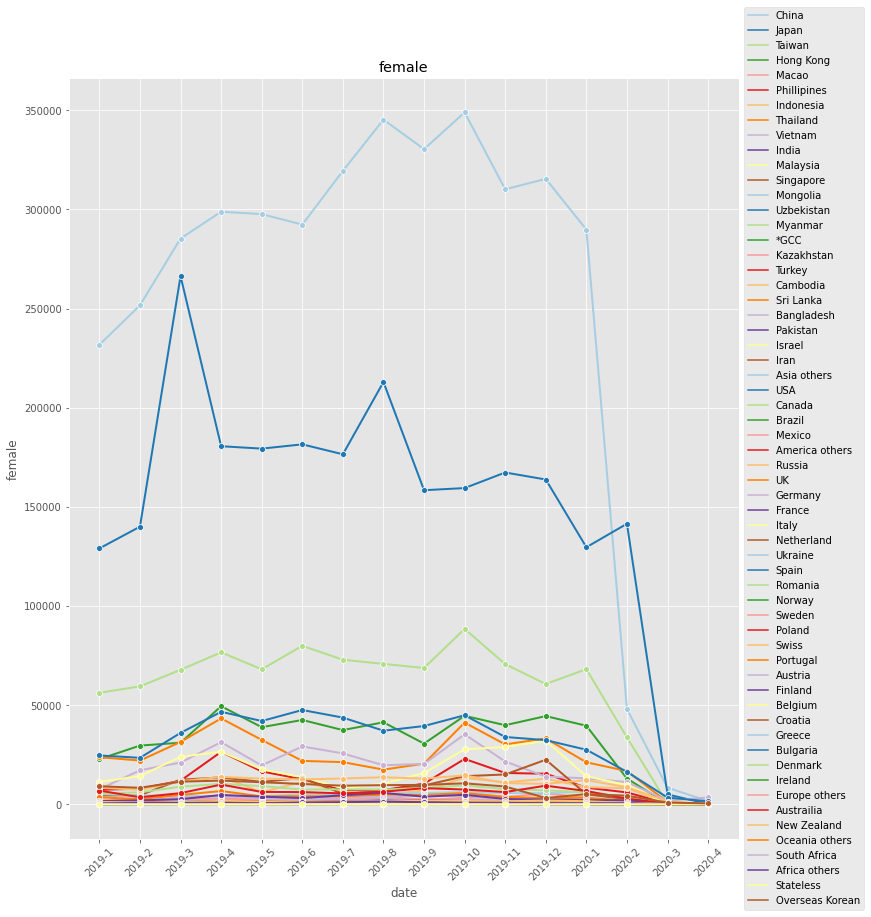

In [ ]:
all_graph(dfg,'date','female',60)#Jumlah wisatawan Wanita ke Korea Selatan

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



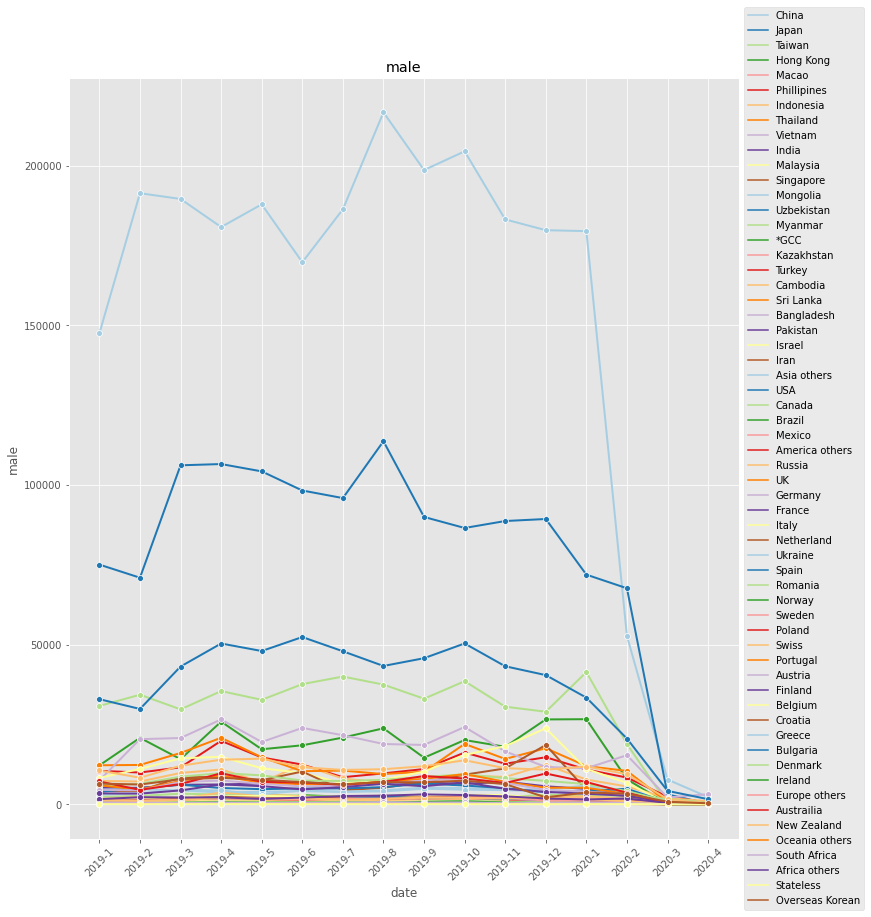

In [ ]:
all_graph(dfg,'date','male',60)#Jumlah Wisatawan Pria ke Korea Selatan

Growth Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



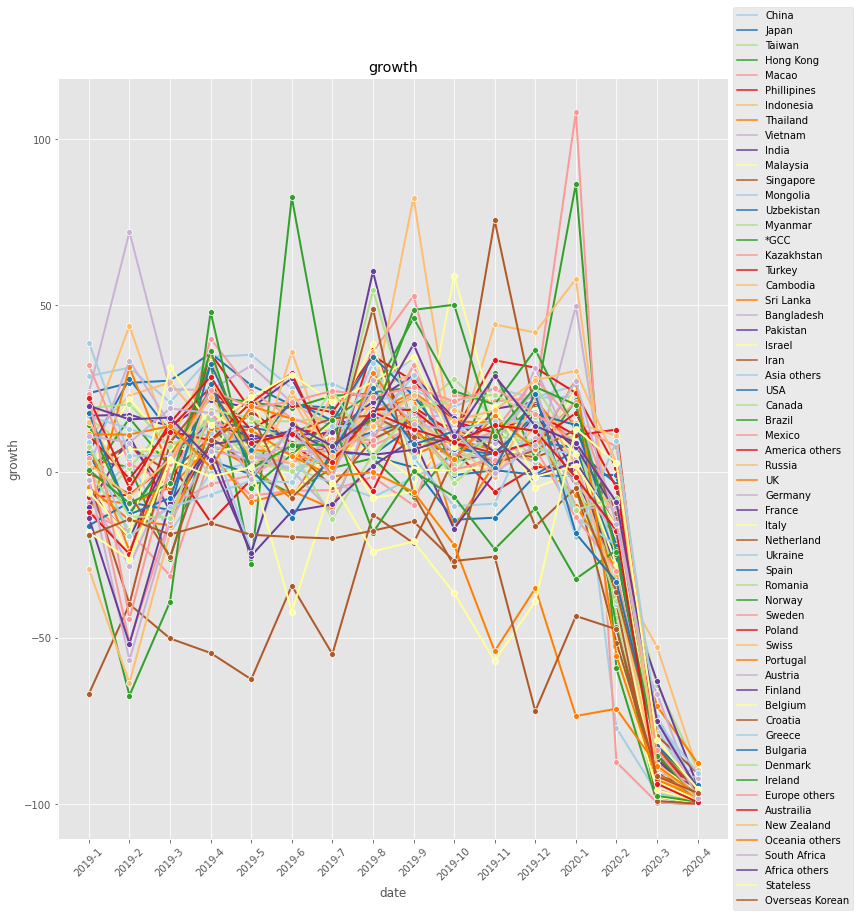

In [ ]:
all_graph(dfa, 'date', 'growth', 60)#grafik tingkat pertumbuhan wisatawan ke Korea Selatan

In [ ]:
top_countries = dfa.groupby('nation').mean()['visitor'].sort_values(ascending=False)[:10].index
top_countries

Index(['China', 'Japan', 'Taiwan', 'USA', 'Hong Kong', 'Thailand', 'Vietnam',
       'Phillipines', 'Malaysia', 'Russia'],
      dtype='object', name='nation')

In [ ]:
df_top = dfa[dfa['nation'].isin(top_countries)]
df_top

,date,nation,visitor,growth,share,age0-20,age21-30,age31-40,age41-50,age51-60,age61
0,2019-1,China,392814,28.737870,35.555117,36520,108591,103657,48574,40893,40998
1,2019-1,Japan,206526,23.606830,18.693468,18015,57921,34165,39811,33857,20330
2,2019-1,Taiwan,87954,16.003693,7.961057,18888,17927,18595,18862,8169,4566
3,2019-1,Hong Kong,35896,3.533212,3.249086,3890,11384,7400,5461,4629,2137
5,2019-1,Phillipines,30473,0.062389,2.758229,1436,5051,5486,3140,1831,811
...,...,...,...,...,...,...,...,...,...,...,...
907,2020-4,Thailand,299,-99.571179,1.016488,3,101,95,39,6,3
908,2020-4,Vietnam,6597,-89.556586,22.427333,909,4769,545,139,122,48
910,2020-4,Malaysia,152,-99.652381,0.516743,7,73,16,10,3,0
925,2020-4,USA,6417,-93.740978,21.815400,486,614,517,393,486,560


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



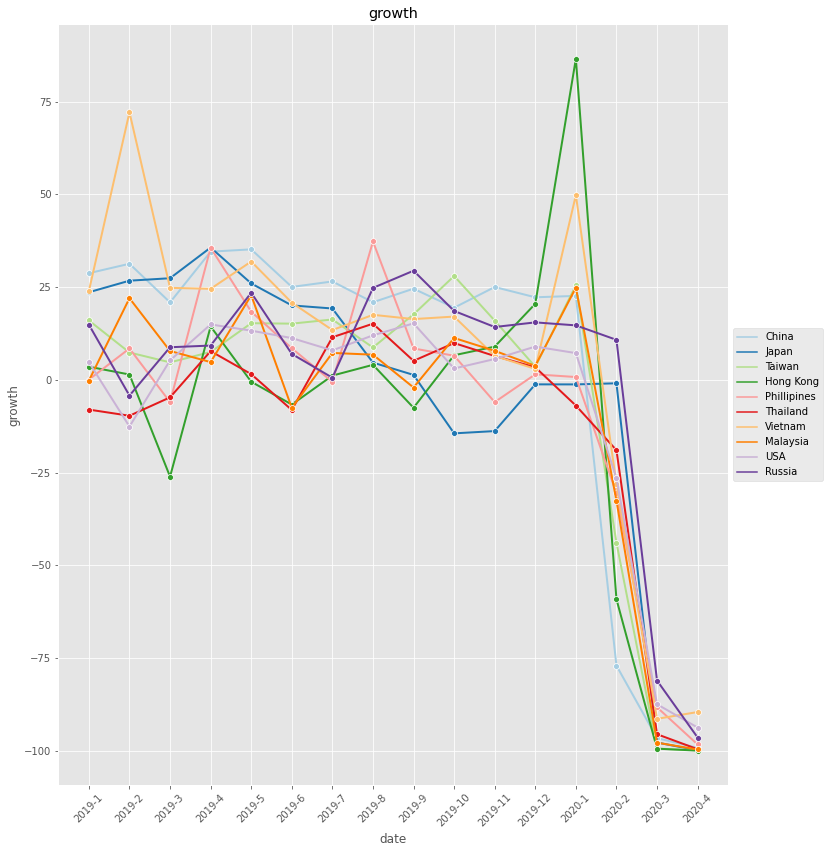

In [ ]:
all_graph(df_top, 'date', 'growth', 10)#grafik pertumbuhan wisatawan ke Korea Selatan

Disini dapat dilihat bahwa China menduduki negara dengan jumlah wisatawan terbaik dan memiliki jumlah wisatawan yang cukup baik. Hal ini dapat dilihat bahwa tidak ada kenaikan secara tiba-tiba maupun penurunan secara tiba-tiba. Penurunan pada bulan Januari 2020 bisa dikatakan tidak secara tiba-tiba dikarenakan terjadi pandemi Covid-19 di Korea Selatan dan pembatasan wisatawan khususnya China. 

In [ ]:
fig = px.histogram(dfa, x="growth")#pesebaran tingkat pertumbuhan wisatawan ke Korea Selatan
fig.show()

Purpose Visualization

Setelah ini, akan dilakukan visualisasi berdasarkan tujuan. Adapun kami mengambil dataset purpose untuk dianalisis berdasarkan tourism, business, official affairs, studying dan others.

In [ ]:
df_ptop = dfp[dfp['nation'].isin(top_countries)]
df_ptop

,date,nation,visitor,growth,share,tourism,business,official affairs,studying,others
0,2019-1,China,392814,28.737870,35.555117,320113,2993,138,8793,60777
1,2019-1,Japan,206526,23.606830,18.693468,198805,2233,127,785,4576
2,2019-1,Taiwan,87954,16.003693,7.961057,86393,74,22,180,1285
3,2019-1,Hong Kong,35896,3.533212,3.249086,34653,59,2,90,1092
5,2019-1,Phillipines,30473,0.062389,2.758229,14279,211,161,184,15638
...,...,...,...,...,...,...,...,...,...,...
907,2020-4,Thailand,299,-99.571179,1.016488,107,1,7,5,179
908,2020-4,Vietnam,6597,-89.556586,22.427333,420,5,7,5334,831
910,2020-4,Malaysia,152,-99.652381,0.516743,29,1,0,61,61
925,2020-4,USA,6417,-93.740978,21.815400,1793,32,227,7,4358


Setelah menampilkan dataset, maka akan divisualisasikan berdasarkan purpose yang ada seperti bisnis, tourism, official affairs dan tujuan lainnya.

In [ ]:
fig = px.pie(df_ptop, values='business', names='nation')
fig.show()
#Persentase dengan tujuan Bisnis ke Korea Selatan

In [ ]:
fig = px.pie(df_ptop, values='official affairs', names='nation')
fig.show()
#Persentase dengan tujuan urusan resmi ke Korea Selatan

In [ ]:
fig = px.pie(df_ptop, values='tourism', names='nation')
fig.show()
#Persentase dengan tujuan jalan-jalan ke Korea Selatan

In [ ]:
fig = px.pie(df_ptop, values='others', names='nation')
fig.show()
#Persentase dengan tujuan lainnya ke Korea Selatan

Membuat Korelasi antar fitur

In [ ]:
dfa.corr()
#Korelasi antara usia dengan lainnya

,visitor,growth,share,age0-20,age21-30,age31-40,age41-50,age51-60,age61
visitor,1.000000,0.169862,0.943717,0.821915,0.992168,0.973318,0.986808,0.983800,0.972752
growth,0.169862,1.000000,0.064344,0.162708,0.154674,0.156835,0.173734,0.163994,0.155484
share,0.943717,0.064344,1.000000,0.773589,0.944393,0.916692,0.929815,0.925878,0.908059
age0-20,0.821915,0.162708,0.773589,1.000000,0.792876,0.715002,0.854018,0.794558,0.735115
age21-30,0.992168,0.154674,0.944393,0.792876,1.000000,0.969840,0.972462,0.973824,0.958264
age31-40,0.973318,0.156835,0.916692,0.715002,0.969840,1.000000,0.932610,0.935163,0.947689
age41-50,0.986808,0.173734,0.929815,0.854018,0.972462,0.932610,1.000000,0.989132,0.962734
age51-60,0.983800,0.163994,0.925878,0.794558,0.973824,0.935163,0.989132,1.000000,0.984865
age61,0.972752,0.155484,0.908059,0.735115,0.958264,0.947689,0.962734,0.984865,1.000000


Disini kita melihat visitor berpengaruh besar terhadap share dan umur.

In [ ]:
dfg.corr()
#Korelasi antara gender dengan lainnya

,visitor,growth,share,male,female,crewman
visitor,1.000000,0.169862,0.943717,0.995244,0.996698,0.593774
growth,0.169862,1.000000,0.064344,0.176012,0.158130,0.209611
share,0.943717,0.064344,1.000000,0.940825,0.939692,0.559677
male,0.995244,0.176012,0.940825,1.000000,0.985864,0.597758
female,0.996698,0.158130,0.939692,0.985864,1.000000,0.545933
crewman,0.593774,0.209611,0.559677,0.597758,0.545933,1.000000


Dapat dilihat bahwa pengunjung dipengaruhi oleh gender dan meningkatkan pendapatran kapita Korea Selatan

In [ ]:
dfp.corr()
#Korelasi antara tujuan dengan lainnya

,visitor,growth,share,tourism,business,official affairs,studying,others
visitor,1.000000,0.169862,0.943717,0.994248,0.768332,0.240117,0.723726,0.837460
growth,0.169862,1.000000,0.064344,0.169117,0.197674,0.094626,0.078824,0.147703
share,0.943717,0.064344,1.000000,0.935432,0.719782,0.222629,0.717170,0.798909
tourism,0.994248,0.169117,0.935432,1.000000,0.751901,0.221326,0.665299,0.776055
business,0.768332,0.197674,0.719782,0.751901,1.000000,0.169479,0.594427,0.683281
official affairs,0.240117,0.094626,0.222629,0.221326,0.169479,1.000000,0.100111,0.299829
studying,0.723726,0.078824,0.717170,0.665299,0.594427,0.100111,1.000000,0.813417
others,0.837460,0.147703,0.798909,0.776055,0.683281,0.299829,0.813417,1.000000


Tujuan terkuat dari pengunjung adalah untuk urusan berwisata, bisnis dan belajar. Akan tetapi tujuan tersebut tidak meningkatkan pendapatan dari negara Korea Selatan.

<h3> Modeling

Disini akan kita lakukan regresi Linear pengaruh antara tourism dan tingkat pengunjung. Untuk itu, kami mengambil sample dari negara yang ada yakni China.

In [ ]:
gk = dfp.groupby('nation')
gk.first()

,date,visitor,growth,share,tourism,business,official affairs,studying,others
nation,,,,,,,,,
*GCC,2019-1,1776,-1.606648,0.160753,1550,37,14,72,103
Africa others,2019-1,2690,19.821826,0.243482,768,718,90,206,908
America others,2019-1,2266,10.861057,0.205104,1541,24,33,128,540
Asia others,2019-1,4554,16.679477,0.412200,1561,308,70,205,2410
Austrailia,2019-1,14285,22.219370,1.292991,12795,93,17,34,1346
Austria,2019-1,776,-2.389937,0.070239,544,8,2,13,209
Bangladesh,2019-1,1247,1.299756,0.112871,149,126,27,97,848
Belgium,2019-1,709,-6.092715,0.064174,490,24,4,22,169
Brazil,2019-1,1605,14.072495,0.145275,1136,16,9,41,403


In [ ]:
dfchn=gk.get_group('China')
dfchn

,date,nation,visitor,growth,share,tourism,business,official affairs,studying,others
0,2019-1,China,392814,28.737870,35.555117,320113,2993,138,8793,60777
60,2019-2,China,453379,31.284441,37.724933,324291,2694,143,38731,87520
120,2019-3,China,487623,20.874389,31.753711,369165,3933,414,32532,81579
180,2019-4,China,493250,34.545722,30.166978,410542,3575,362,9959,68812
240,2019-5,China,500413,35.165657,33.682331,413949,4034,534,14003,67893
300,2019-6,China,475007,25.037708,32.177294,395196,3743,399,14680,60989
360,2019-7,China,519132,26.513573,35.849999,439699,3587,356,10847,64643
420,2019-8,China,578112,20.908521,36.444075,451570,3625,388,44291,78238
480,2019-9,China,541350,24.564249,37.087302,432018,3873,447,25545,79467
540,2019-10,China,567695,19.437542,34.277063,476460,3967,547,12722,73999


In [ ]:
from sklearn import linear_model

Setelah diperoleh datast China, kami membuat sebuah data modeling dengan berisi visitor dan tourism.

In [ ]:
dfmod=dfchn[['visitor','tourism']]
dfmod.head()

,visitor,tourism
0,392814,320113
60,453379,324291
120,487623,369165
180,493250,410542
240,500413,413949


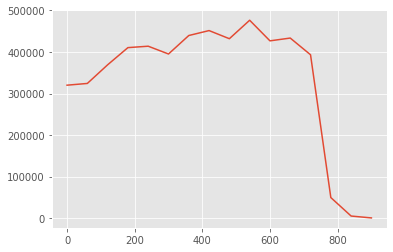

In [ ]:
plt.plot(dfmod["tourism"],label='Tourism count')

In [ ]:
from sklearn.model_selection import train_test_split
y = dfchn['visitor'] # dependent variable
X = dfchn[['tourism']] # independent variable
x_train, x_test, y_train, y_test =train_test_split(X, y,test_size=0.25, random_state=0)

In [ ]:
print('xtrain shape')
print(x_train.shape)
print('xtest shape')
print(x_test.shape)

xtrain shape
(12, 1)
xtest shape
(4, 1)


Kami menggunakan metode Regresi Linear dengan Model OLS Regresion (Ordinary Least Square Regression)

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
x = sm.add_constant(x_train) # adding a constant
lm = sm.OLS(y_train,x_train).fit() # fitting the model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
prediction=lm.predict(x_train)
prediction

780     60636.002539
240    506870.206278
120    452033.317391
840      6171.354055
600    522665.933918
420    552936.180662
900       639.175956
660    530904.201792
180    502698.419916
0      391970.369157
300    483907.626399
720    481630.102879
dtype: float64

In [ ]:
lm.summary()

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning:

kurtosistest only valid for n>=20 ... continuing anyway, n=12



<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                visitor   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              4932.
Date:                Sat, 25 Jun 2022   Prob (F-statistic):                    6.06e-16
Time:                        11:39:50   Log-Likelihood:                         -136.00
No. Observations:                  12   AIC:                                      274.0
Df Residuals:                      11   BIC:                                      274.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tourism        1.2245      0.017     70.225      0.000       1.186       1.263
==============================================================================
Omnibus:                        1.555   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.459   Jarque-Bera (JB):                1.131
Skew:                           0.674   Prob(JB):                        0.568
Kurtosis:                       2.333   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test data uji

In [ ]:
xt = sm.add_constant(x_test) # adding a constant
lml = sm.OLS(y_test,x_test).fit() # fitting the model

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [ ]:
lml.predict(x_test)

60     400561.234614
360    543112.125525
480    533624.625585
540    588518.971678
dtype: float64

Setelah diproses, maka akan dibuat sebuah kesimpulan berdasarkan penggunaan OLS Regression

In [ ]:
print(lml.summary())

                                 OLS Regression Results                                
Dep. Variable:                visitor   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              844.9
Date:                Sat, 25 Jun 2022   Prob (F-statistic):                    8.94e-05
Time:                        11:39:50   Log-Likelihood:                         -47.050
No. Observations:                   4   AIC:                                      96.10
Df Residuals:                       3   BIC:                                      95.49
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning:

omni_normtest is not valid with less than 8 observations; 4 samples were given.



Untuk Perbandingan, maka digunakan Polynominal Regression untuk menganalisis data tersebut

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(x_train)
train_x_poly

array([[1.00000000e+00, 4.95200000e+04, 2.45223040e+09],
       [1.00000000e+00, 4.13949000e+05, 1.71353775e+11],
       [1.00000000e+00, 3.69165000e+05, 1.36282797e+11],
       [1.00000000e+00, 5.04000000e+03, 2.54016000e+07],
       [1.00000000e+00, 4.26849000e+05, 1.82200069e+11],
       [1.00000000e+00, 4.51570000e+05, 2.03915465e+11],
       [1.00000000e+00, 5.22000000e+02, 2.72484000e+05],
       [1.00000000e+00, 4.33577000e+05, 1.87989015e+11],
       [1.00000000e+00, 4.10542000e+05, 1.68544734e+11],
       [1.00000000e+00, 3.20113000e+05, 1.02472333e+11],
       [1.00000000e+00, 3.95196000e+05, 1.56179878e+11],
       [1.00000000e+00, 3.93336000e+05, 1.54713209e+11]])

In [ ]:
regr = linear_model.LinearRegression()
train_y_ = regr.fit(train_x_poly, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [ 0.00000000e+00  1.34186711e+00 -3.83401641e-07]
Intercept:  15504.945687125146


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(train_x_poly,y_train)
prediction = regressor.predict(poly.transform([[11]]))
print(prediction)

[15519.70617891]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



Data Uji akan diujikan

In [ ]:
poly = PolynomialFeatures(degree=2)
test_x_poly = poly.fit_transform(x_test)
test_x_poly

array([[1.00000000e+00, 3.24291000e+05, 1.05164653e+11],
       [1.00000000e+00, 4.39699000e+05, 1.93335211e+11],
       [1.00000000e+00, 4.32018000e+05, 1.86639552e+11],
       [1.00000000e+00, 4.76460000e+05, 2.27014132e+11]])

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(test_x_poly,y_test)
prediction = regressor.predict(poly.transform([[11]]))
print(prediction)

[376097.05306417]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



In [ ]:
test_y_ = regr.fit(test_x_poly, y_test)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [ 0.00000000e+00 -9.94609203e-02  1.04402853e-06]
Intercept:  376098.1470079649


In [ ]:
print('Score: ', regr.score(test_x_poly, y_test))

Score:  0.9428112913071287
